In [1]:
print("Hello word")

Hello word


In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import os
import pandas as pd
HOUSING_PATH = r"E:/github/handson-ml2/datasets/housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [4]:
housing = load_housing_data()

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


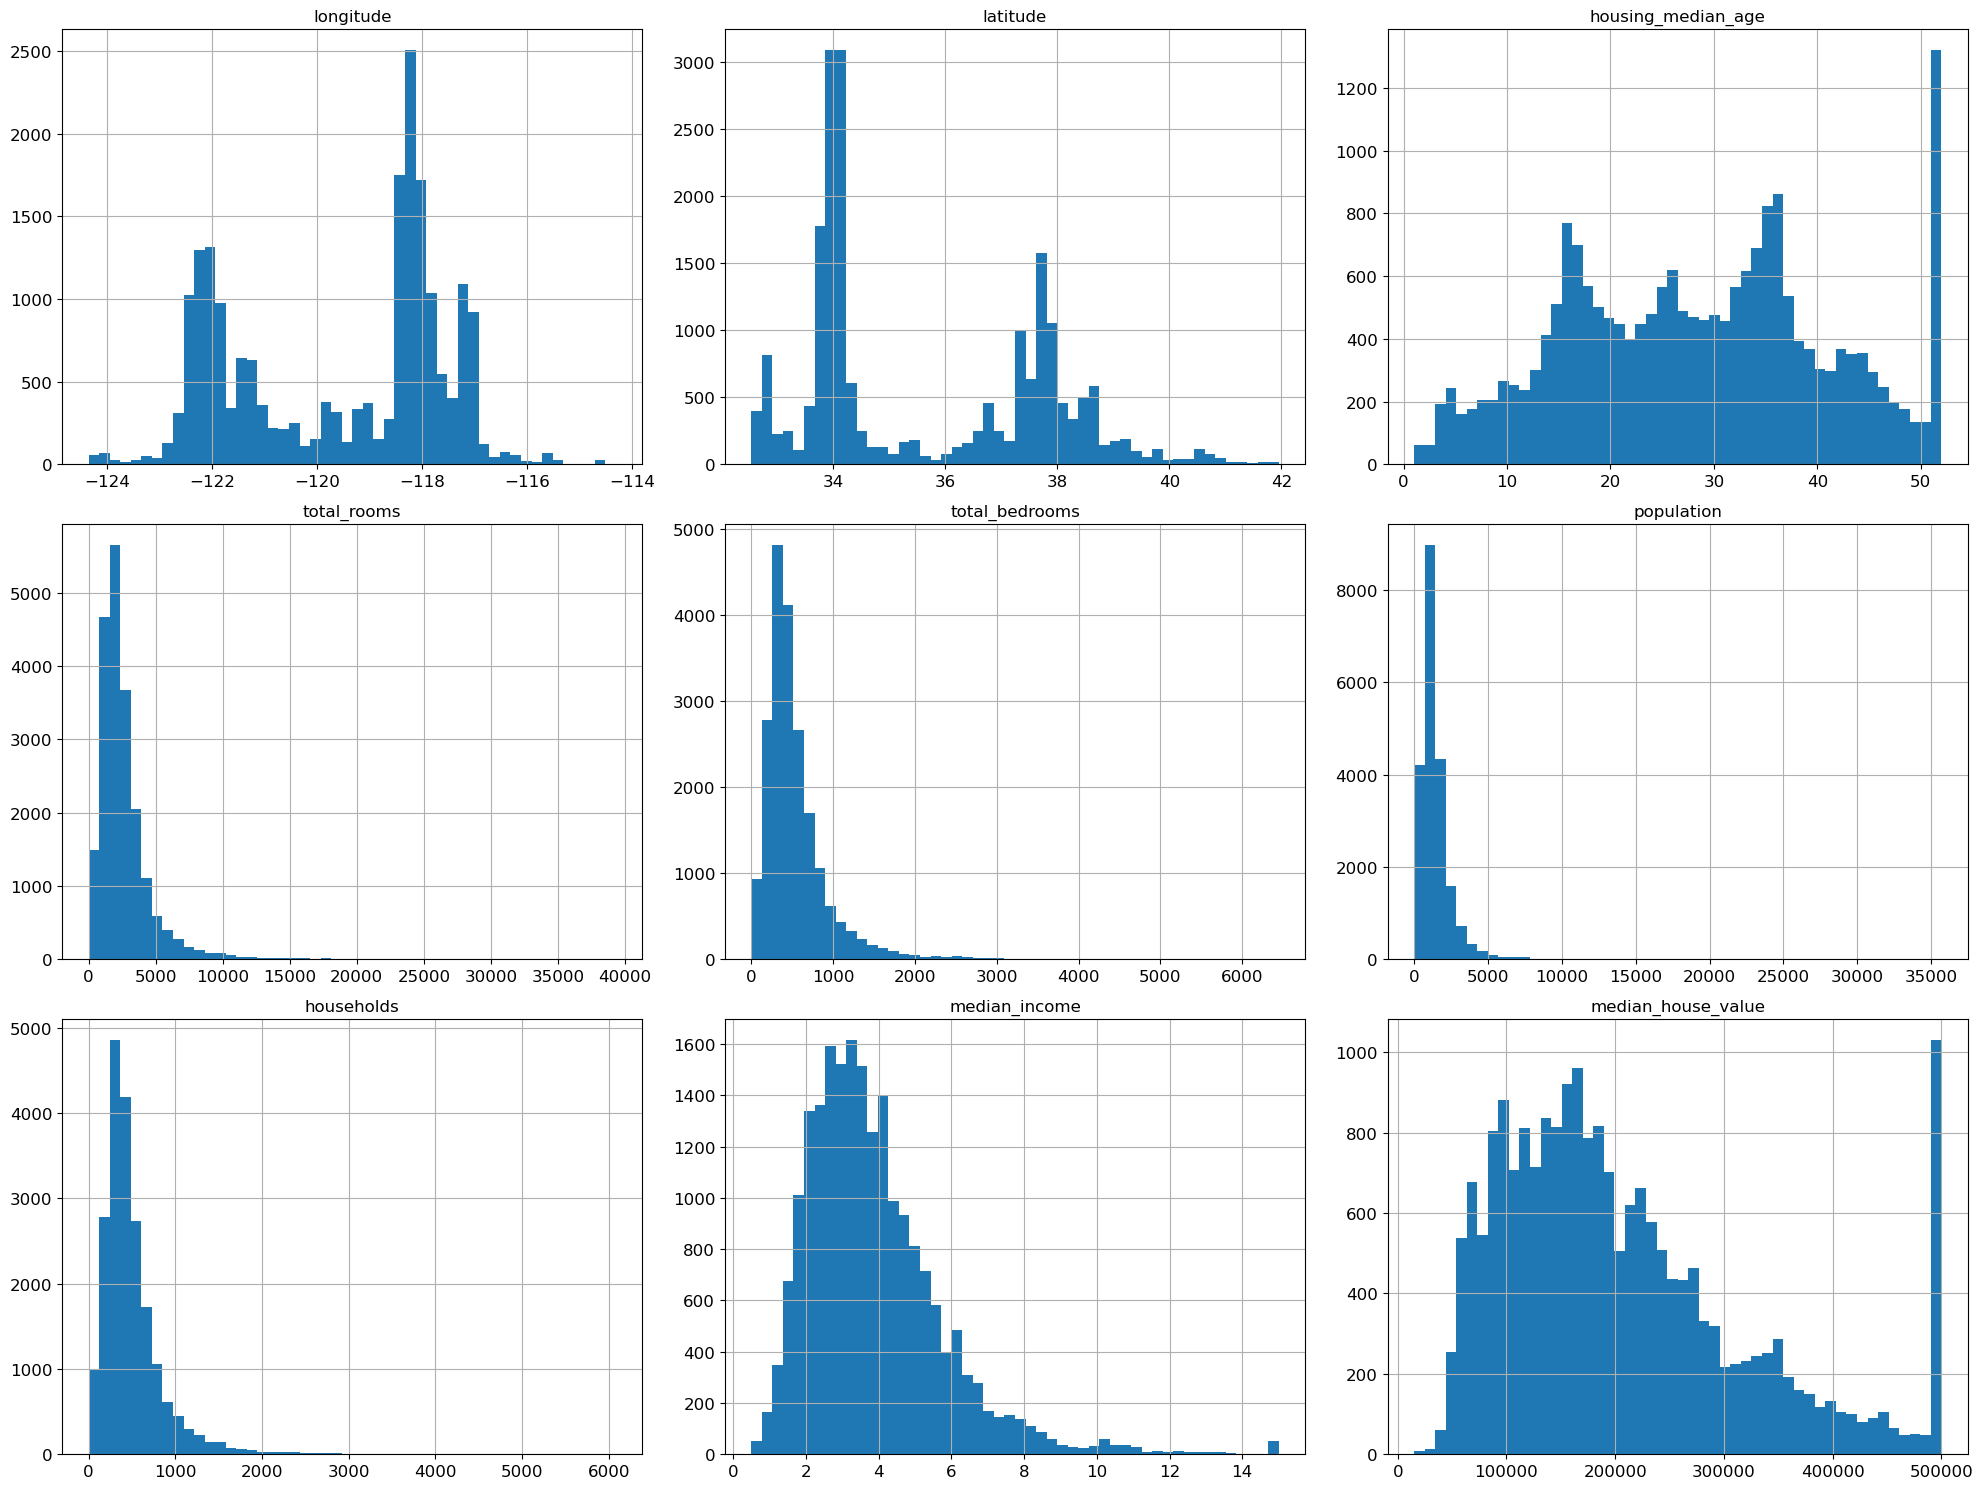

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

Scikit-Learn提供了一些函数，可以通过多种方式将数据集分成多个子集。

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [14]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [18]:
len(housing)

20640

In [19]:
len(test_set)

4128

## 下面讲的是分层抽样

---



<Axes: >

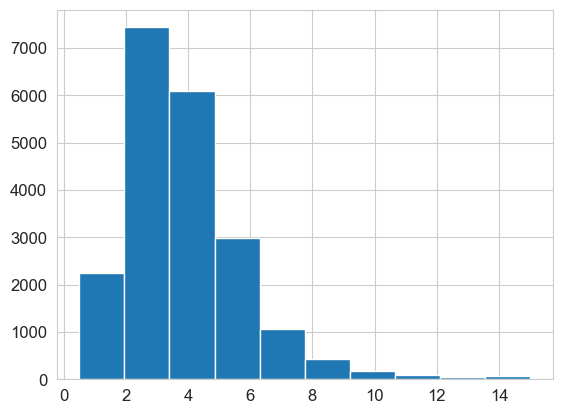

In [14]:
housing["median_income"].hist()

In [6]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

这段代码的作用是将 `housing["median_income"]`（可能是一个连续的数值变量）划分为几个类别，并存储到新的列 `income_cat` 中。以下是逐步解析：

---

### **代码解析**

```python
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
```

1. **`housing["median_income"]`**：
   - `median_income` 是原始数据集中一个列，表示中位收入的数值。

2. **`pd.cut()`**：
   - Pandas 提供的函数，用于将连续数据划分为离散的区间。其主要参数：
     - **`x`**：需要划分的数据（这里是 `housing["median_income"]`）。
     - **`bins`**：划分的区间边界。
     - **`labels`**：为每个区间指定类别标签。
   - 返回值是一个类别型变量（`Categorical` 类型）。

3. **`bins=[0., 1.5, 3.0, 4.5, 6., np.inf]`**：
   - 定义了区间边界：
     - `[0., 1.5)`：第一个区间，表示收入在 0 到 1.5 之间（左闭右开）。
     - `[1.5, 3.0)`：第二个区间。
     - `[3.0, 4.5)`：第三个区间。
     - `[4.5, 6.0)`：第四个区间。
     - `[6.0, ∞)`：最后一个区间，表示 6 及以上。

4. **`labels=[1, 2, 3, 4, 5]`**：
   - 为每个区间指定一个标签（从 1 到 5）。这些标签可以表示收入类别。

5. **赋值给 `housing["income_cat"]`**：
   - 将划分后的类别结果存储到 `housing` 数据框中的新列 `income_cat`。

---

### **作用**
这段代码将连续的 `median_income` 列按指定区间划分为离散的收入类别，方便后续分析或建模。例如：
- 在分层采样（如 `StratifiedShuffleSplit`）中，收入类别可能作为分层依据。
- 在数据建模中，类别数据比连续数据更容易用于某些分析场景。

---

### **示例**

#### 输入数据：
```python
import pandas as pd
import numpy as np

data = {'median_income': [0.5, 1.8, 2.5, 4.0, 5.5, 6.2]}
housing = pd.DataFrame(data)
```

#### 执行代码：
```python
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])
print(housing)
```

#### 输出结果：
```
   median_income income_cat
0            0.5         1
1            1.8         2
2            2.5         2
3            4.0         3
4            5.5         4
5            6.2         5
```

---

### **注意事项**
1. **缺失值**：
   如果 `median_income` 列中有缺失值，结果中对应的 `income_cat` 将会是 NaN。

2. **区间边界**：
   区间是左闭右开，例如 `1.5` 属于 `[1.5, 3.0)`，而不属于 `[0., 1.5)`。

3. **`np.inf`**：
   使用 `np.inf` 表示正无穷大，可以确保收入超过 6 的数据都被划分到最后一个类别。

4. **替代方式**：
   如果你需要返回数值而非类别，可以设置 `retbins=True` 或直接使用其他方法，如 `np.digitize`。

---

如果你有其他关于 Pandas 的问题，欢迎随时提问！

<Axes: >

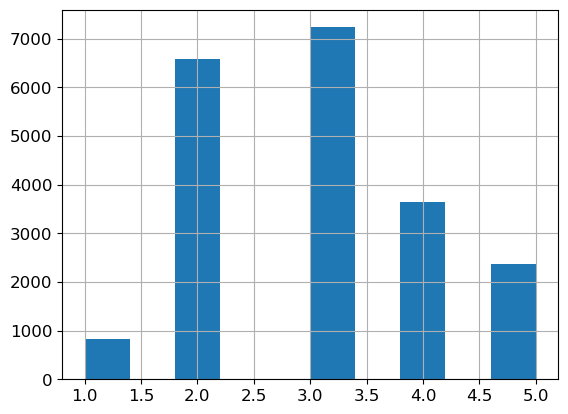

In [22]:
housing["income_cat"].hist()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

这段代码使用了 `scikit-learn` 提供的 `StratifiedShuffleSplit` 类，进行分层随机抽样，将数据集拆分为训练集和测试集。以下是逐步的解释：

### **1. 导入 `StratifiedShuffleSplit`**
```python
from sklearn.model_selection import StratifiedShuffleSplit
```
`StratifiedShuffleSplit` 是一种交叉验证策略，用于保证分层抽样，即按照某个类别变量（这里是 `income_cat`）的分布比例，随机分割数据集。

---

### **2. 初始化分层抽样对象**
```python
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
```
- **`n_splits=1`**：指定生成的拆分次数。这里仅需要一次拆分，即生成一个训练集和一个测试集。
- **`test_size=0.2`**：指定测试集占总数据集的20%。
- **`random_state=42`**：设置随机种子，以保证结果的可重复性。

---

### **3. 分层抽样拆分数据集**
```python
for train_index, test_index in split.split(housing, housing["income_cat"]):
```
- **`housing`**：输入的数据集（假设是一个 Pandas DataFrame）。
- **`housing["income_cat"]`**：指定分层抽样的依据，这里是 `income_cat` 列。
  - **作用**：保证训练集和测试集中，`income_cat` 的分布比例与原始数据一致。
- **`split.split()`**：
  - 返回训练集和测试集的索引（`train_index` 和 `test_index`）。
  - 使用 `for` 循环，因为 `split.split()` 是一个生成器，可以生成多次拆分（但这里 `n_splits=1`，只会生成一次）。

---

### **4. 根据索引提取数据**
```python
strat_train_set = housing.loc[train_index]
strat_test_set = housing.loc[test_index]
```
- **`housing.loc[train_index]`**：根据训练集索引提取对应的数据行。
- **`housing.loc[test_index]`**：根据测试集索引提取对应的数据行。

---

### **总结**
这段代码的目的是在保证 `income_cat` 列的分布与原始数据一致的前提下，将数据分为训练集（80%）和测试集（20%）。分层抽样的优势是确保某些重要的类别特征不会因为随机分割而在训练或测试集中过度偏离，从而提高模型的表现和泛化能力。

In [9]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [10]:
housing["income_cat"].value_counts()/len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [11]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

NameError: name 'train_test_split' is not defined

In [27]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
income_cat,,,,,
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


上述结果说明：    
Overall->原始数据   
Stratified->使用Scikit-Learn的StratifiedShuffleSplit类,分层随机划分数据集  
Random->纯随机的，没有分层，简单的把一大块数据切出来当测试集 train_test_split()

In [36]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [37]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.9+ MB


In [17]:
strat_test_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4128 entries, 5241 to 3965
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      4079 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


这段代码在数据处理过程中非常常见，以下是逐步的解析和说明：

---

### **代码解析**

```python
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
```

- **`for set_ in (strat_train_set, strat_test_set):`**
  - 这是一个 `for` 循环，用于依次遍历元组中的两个数据集：`strat_train_set`（分层采样后的训练集）和 `strat_test_set`（分层采样后的测试集）。
  - `set_` 是循环中的临时变量，代表当前的一个数据集。

- **`set_.drop("income_cat", axis=1, inplace=True)`**
  - 这是对 pandas 数据帧的操作：
    - **`"income_cat"`**：表示要删除的数据帧列名称。
    - **`axis=1`**：表示操作的对象是列。`axis=0` 则表示行。
    - **`inplace=True`**：表示直接在原数据帧上执行操作，而不是返回一个新数据帧。

---

### **作用**
这段代码的作用是：
1. 删除 `strat_train_set` 和 `strat_test_set` 数据集中的 `income_cat` 列。
2. 操作直接影响原数据集（由于使用了 `inplace=True`）。

通常，这种删除列的操作在数据预处理阶段出现。比如 `income_cat` 列可能是一个辅助列（如分层采样的依据），在训练模型时不需要，故被移除。

---

### **常见问题**
1. **如果 `inplace=True` 不生效**  
   确保 `strat_train_set` 和 `strat_test_set` 是 pandas DataFrame 类型。如果它们是其他类型的数据结构（如 numpy 数组），会报错。

2. **`KeyError`**  
   如果 `income_cat` 列不存在，会报 `KeyError`。确保删除之前该列在数据帧中。

---

### **改进**
如果你不确定 `income_cat` 列是否存在，可以使用以下代码避免报错：
```python
for set_ in (strat_train_set, strat_test_set):
    if "income_cat" in set_.columns:
        set_.drop("income_cat", axis=1, inplace=True)
```

---



# 2.4 从数据探索和可视化中获得洞见

In [49]:
houring = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

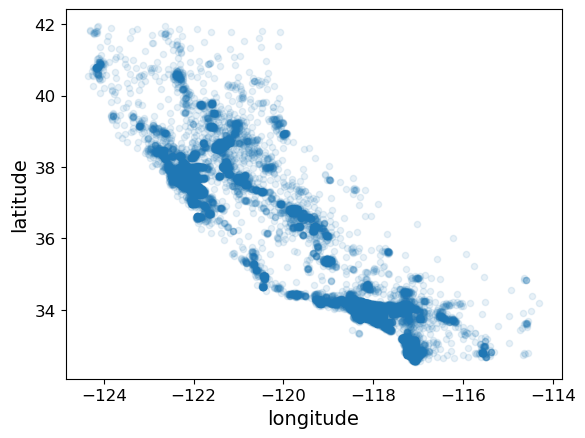

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Saving figure housing_prices_scatterplot


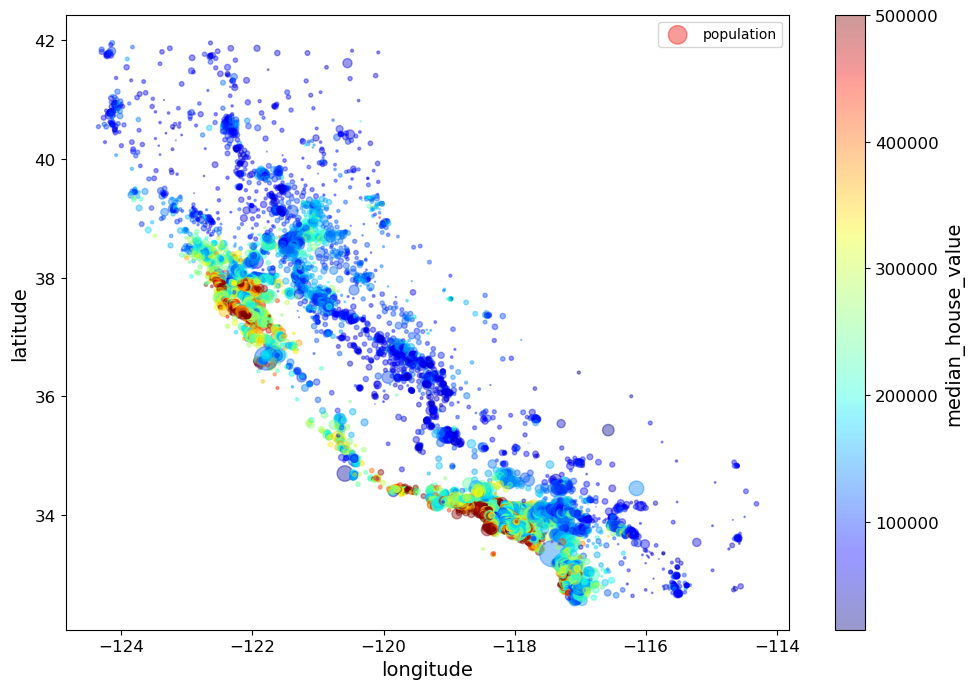

In [31]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

由于数据集不大，你可以使用corr（）方法轻松计算出每对属性之
间的标准相关系数（也称为皮尔逊r）：

In [22]:
print(housing.dtypes)

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_cat            category
dtype: object


In [52]:
housing = housing.drop(columns=['ocean_proximity', 'income_cat'])

In [54]:
corr_matrix = housing.corr()

In [55]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

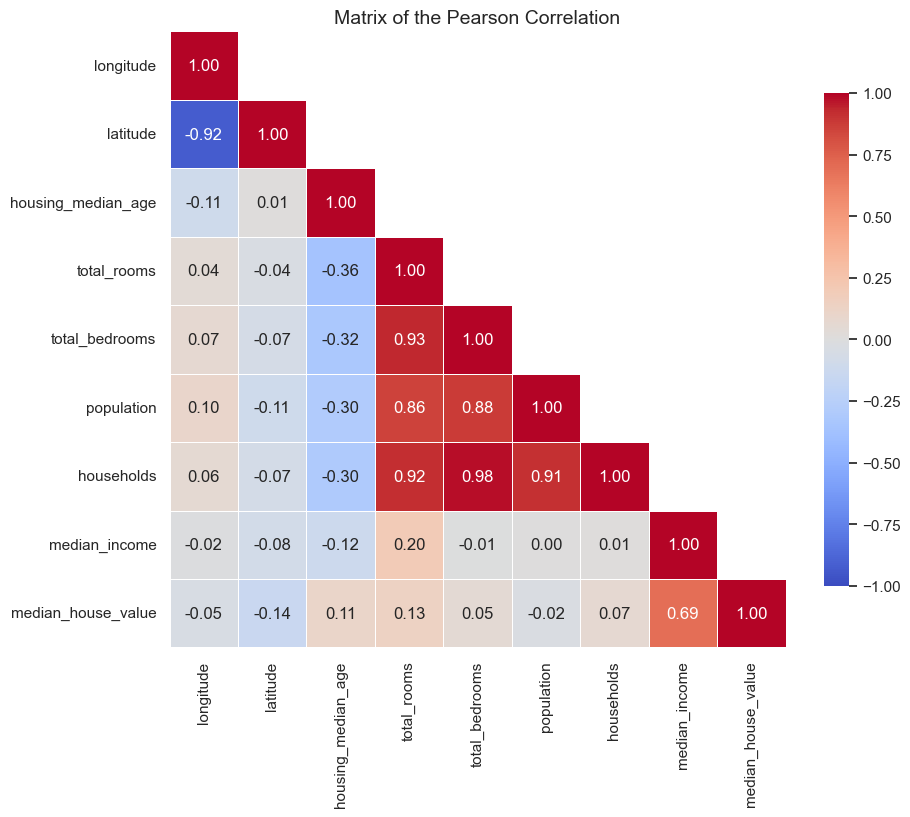

In [59]:
# 设置绘图风格
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 创建掩码，只保留下三角
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
sns.set(style="white")

# 绘制热图
sns.heatmap(corr_matrix,mask=mask,annot=True, cmap="coolwarm", fmt=".2f", square=True, 
            linewidths=0.5, cbar_kws={"shrink": 0.8}, vmin=-1, vmax=1)

# 添加标题
plt.title("Matrix of the Pearson Correlation", fontsize=14)
plt.show()


Saving figure income_vs_house_value_scatterplot


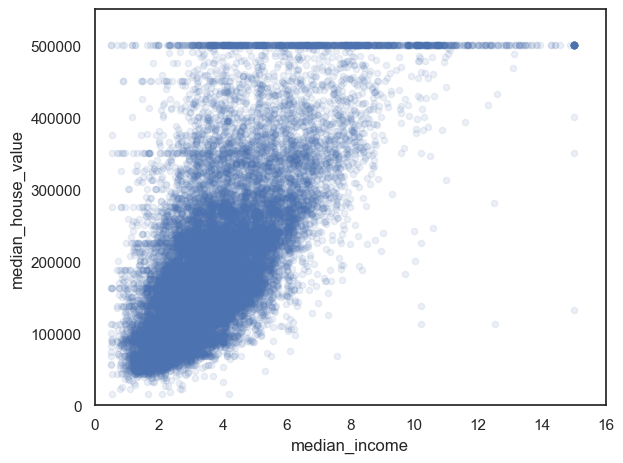

In [60]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])
save_fig("income_vs_house_value_scatterplot")

## 2.5机器学习算法的数据准备

In [39]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

In the book 3 options are listed:

```python
housing.dropna(subset=["total_bedrooms"])    # option 1
housing.drop("total_bedrooms", axis=1)       # option 2
median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
```

In [17]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY,2
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN,3
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN,3
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN,3
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN,5


In [39]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])    # option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


### 总结：
`dropna(subset=["total_bedrooms"])` 会删除 `sample_incomplete_rows` 中 `total_bedrooms` 列中存在缺失值的行。如果不加 `inplace=True`，它将返回一个新的 `DataFrame`。

In [40]:
sample_incomplete_rows.drop("total_bedrooms", axis=1)       # option 2

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN


### **总结：**
`drop("total_bedrooms", axis=1)` 会删除 `sample_incomplete_rows` 数据框中的 **`total_bedrooms`** 列。
如果你想在原地修改数据框，可以使用 `inplace=True`，否则它会返回一个新的数据框，而原始数据框不变。

In [18]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3

C:\Users\KZ\AppData\Local\Temp\ipykernel_15044\3085765398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) # option 3


In [44]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


# 中位数填充
fillna(median, inplace=True) 将 sample_incomplete_rows 中的 total_bedrooms 列的缺失值替换为中位数，从而填充缺失数据。
inplace=True 表示该操作会直接修改原数据框。

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

这段代码使用了 `sklearn.impute.SimpleImputer` 来填充 `housing_num` 数据框中缺失的数值数据，具体使用了 **中位数**（`strategy="median"`）作为填充值。

### **解释：**

1. **创建 `SimpleImputer` 实例：**
   ```python
   imputer = SimpleImputer(strategy="median")
   ```
   - `SimpleImputer` 是一个用来处理缺失值的类，可以通过不同策略填充缺失数据。
   - `strategy="median"` 指定填充缺失值时，使用 **中位数**。常用的策略还有：
     - `"mean"`：用均值填充。
     - `"most_frequent"`：用出现频率最高的值填充。
     - `"constant"`：用常数值填充（可以通过 `fill_value` 参数指定常数）。

2. **删除非数值列：**
   ```python
   housing_num = housing.drop("ocean_proximity", axis=1)
   ```
   - `housing.drop("ocean_proximity", axis=1)` 是删除 `housing` 数据框中的 `ocean_proximity` 列，通常该列包含类别数据（如 `NEAR BAY`、`NEAR OCEAN` 等），不适合用于数值计算。
   - 结果是 `housing_num` 只包含数值型数据，便于进行填充操作。

3. **训练 `SimpleImputer`：**
   ```python
   imputer.fit(housing_num)
   ```
   - `imputer.fit(housing_num)` 计算 `housing_num` 数据框中各列的 **中位数**，并存储在 `imputer` 对象中，作为后续填充操作的参考。
   - 这个过程只计算了中位数，并没有对数据进行填充。填充操作要等到调用 `transform()` 或 `fit_transform()` 才会执行。

### **填充缺失值：**
接下来，你可以使用 `transform()` 方法将 `housing_num` 中的缺失值替换为中位数：

```python
housing_num_imputed = imputer.transform(housing_num)
```

这会返回一个 **NumPy 数组**，其中的缺失值已经被相应的中位数填充。如果你希望结果仍然是一个 `DataFrame`，可以将其转换回 `DataFrame`，并为列命名：

```python
housing_num_imputed = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns)
```

### **总结：**
- `SimpleImputer(strategy="median")` 用于使用中位数填充缺失值。
- `imputer.fit(housing_num)` 计算了每一列的中位数，但并没有填充缺失值。
- 使用 `imputer.transform(housing_num)` 将缺失值填充为中位数。如果需要，返回的数据可以转换为 `DataFrame`。

### 2个数据对比，一个是skl算的，一个是手动算的

In [15]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155,    3.     ])

In [22]:
housing_num.median().values

TypeError: 'Categorical' with dtype category does not support reduction 'median'

In [20]:
X = imputer.transform(housing_num) #填充操作

In [21]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [23]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,2.0
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,3.0
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,3.0
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,3.0
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,5.0


In [54]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [56]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## 2.5.2 处理文本和分类属性

In [24]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


# 适合类别之间存在顺序关系的情况

In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

这段代码使用 `scikit-learn` 的 `OrdinalEncoder` 对类别型数据进行编码，将其转换为数字表示（即，将类别值映射为整数值）。下面是逐步的解释：

---

### **1. 导入 `OrdinalEncoder`**
```python
from sklearn.preprocessing import OrdinalEncoder
```
`OrdinalEncoder` 是用于将类别型数据转换为整数型的编码器。它将每个类别映射为一个整数（从 0 开始），适用于类别之间有隐含顺序关系的情况。

---

### **2. 创建 `OrdinalEncoder` 对象**
```python
ordinal_encoder = OrdinalEncoder()
```
这里初始化了一个 `OrdinalEncoder` 对象。这个对象可以对数据进行编码。

---

### **3. 对类别数据进行编码**
```python
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
```
- **`fit_transform()`**：
  - **`fit`**：计算每一列类别值的唯一集合，并为每个类别分配一个整数。
  - **`transform`**：将数据中的类别值转换为对应的整数编码。
- **输入：`housing_cat`**：
  - 假设 `housing_cat` 是一个类别型数据（例如 Pandas DataFrame 或 NumPy 数组）。
  - 每一列可能代表一个类别特征，例如“地区名称”或“分类标识”。
- **输出：`housing_cat_encoded`**：
  - 返回的是一个 NumPy 数组，其中每个类别值被替换为相应的整数。

---

### **4. 查看前 10 个编码结果**
```python
housing_cat_encoded[:10]
```
- **`housing_cat_encoded[:10]`**：提取编码结果中的前 10 行数据，用于查看编码的效果。



### **注意**
1. `OrdinalEncoder` 的编码结果是连续整数，适合类别之间存在顺序关系的情况。如果类别之间没有顺序关系，通常推荐使用 `OneHotEncoder`。
2. 如果数据集中类别值是字符串，`OrdinalEncoder` 会自动按字符串字典序进行编码。

In [23]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 独热代码

In [25]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

## 2.5.3 自定义转换器

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

这段代码定义了一个自定义的特征转换器类 `CombinedAttributesAdder`，用于扩展数据集，添加一些新的特征。以下是详细的解释：

---

### **1. 目标**
通过对现有数据计算比率或其他组合特征，生成新的特征以丰富数据集，帮助模型更好地学习。  
这里特别针对房屋数据，增加与房间数量、人口数量和住户数量相关的派生特征。

---

### **2. 定义特征列索引**
```python
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
```
- 定义了房屋数据集中的特征列索引：
  - `rooms_ix`: 房间总数的列索引。
  - `bedrooms_ix`: 卧室数量的列索引。
  - `population_ix`: 人口数量的列索引。
  - `households_ix`: 住户数量的列索引。

这些索引假设与 `housing` 数据集的列顺序一致。

---

### **3. 自定义转换器类**
```python
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
```
- 继承自 `BaseEstimator` 和 `TransformerMixin`，是一个 `scikit-learn` 风格的转换器，可以与其他工具链无缝集成（例如流水线）。
- **功能**：根据输入参数，动态生成新的特征并将其添加到数据集中。

#### **`__init__` 方法**
```python
def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
```
- 定义了一个初始化参数 `add_bedrooms_per_room`，用于控制是否添加特征 `bedrooms_per_room`（卧室/房间比率）。
- 默认值为 `True`，即默认会添加该特征。

#### **`fit` 方法**
```python
def fit(self, X, y=None):
    return self
```
- `fit` 方法在此类中没有复杂操作，直接返回 `self`。
- 用于兼容 `scikit-learn` 的流水线 API。

#### **`transform` 方法**
```python
def transform(self, X):
```
- 核心的特征转换逻辑，接收输入数据 `X`（通常是 NumPy 数组）。

---

### **4. 新特征的计算**
#### **计算每户的房间数量**
```python
rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
```
- 计算每户房间数量（`rooms_per_household`）。

#### **计算每户的人口数量**
```python
population_per_household = X[:, population_ix] / X[:, households_ix]
```
- 计算每户的人口数量（`population_per_household`）。

#### **计算卧室/房间比率**
```python
bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
```
- 如果 `add_bedrooms_per_room` 为 `True`，计算卧室与房间数量的比率。

#### **添加新特征**
- 如果 `add_bedrooms_per_room` 为 `True`：
```python
return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
```
将新特征 `rooms_per_household`、`population_per_household` 和 `bedrooms_per_room` 添加到原数据集 `X`。

- 如果 `add_bedrooms_per_room` 为 `False`：
```python
return np.c_[X, rooms_per_household, population_per_household]
```
仅添加前两个新特征。

---

### **5. 使用转换器**
```python
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)
```
- **实例化转换器**：将 `add_bedrooms_per_room` 设置为 `False`，表示只添加 `rooms_per_household` 和 `population_per_household` 特征。
- **应用转换器**：调用 `transform` 方法，将 `housing` 数据集转换为包含新特征的扩展数据集 `housing_extra_attribs`。

---

### **注意**
1. **输入数据格式**：`housing` 必须是一个 NumPy 数组或可以通过 `.values` 转换为 NumPy 数组的 Pandas DataFrame。
2. **依赖库**：代码中假设 `np` 是 `NumPy` 的缩写，需确保导入：`import numpy as np`。
3. **新特征位置**：添加的新特征会作为列附加到原始数据的末尾。

### **总结**
- **目的**：动态添加有用的派生特征，增强数据集。
- **灵活性**：通过 `add_bedrooms_per_room` 参数控制特征添加行为。
- **优点**：符合 `scikit-learn` 的标准 API，可以轻松嵌入流水线中。

In [27]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

这段代码的目的是动态获取指定列在数据框 `housing` 中的索引，避免硬编码列索引，从而提高代码的通用性和可维护性。以下是逐步的解释：

---

### **1. 定义列名**
```python
col_names = "total_rooms", "total_bedrooms", "population", "households"
```
- `col_names` 是一个元组，包含需要查找索引的列名：
  - `"total_rooms"`：房间总数。
  - `"total_bedrooms"`：卧室总数。
  - `"population"`：人口数量。
  - `"households"`：住户数量。

---

### **2. 获取列索引**
```python
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names
]
```
- **`housing.columns`**：
  - 假设 `housing` 是一个 Pandas DataFrame。
  - `housing.columns` 是一个包含列名的 `Index` 对象。

- **`get_loc(c)`**：
  - `get_loc()` 是 Pandas 提供的方法，用于返回某列名对应的索引。
  - 输入列名 `c`，输出该列在数据框中的位置（从 0 开始）。

- **列表推导式**：
  - `[housing.columns.get_loc(c) for c in col_names]`：
    - 遍历 `col_names` 中的每个列名 `c`。
    - 调用 `get_loc()` 获取对应的索引。
    - 返回一个列表，包含每个列名的索引。

- **解包**：
  - `rooms_ix, bedrooms_ix, population_ix, households_ix`：
    - 将列表中的索引值依次解包为四个变量，分别表示每列的索引。

---

### **3. 动态索引的优点**
相比直接硬编码索引（如 `rooms_ix = 3`），动态获取索引具有以下优点：
1. **灵活性**：代码不依赖数据框的固定列顺序。如果列顺序发生变化，代码仍然有效。
2. **可读性**：通过列名明确表达逻辑，代码更易理解。
3. **可维护性**：避免手动查找列索引，减少出错可能。

---

### **示例**
假设 `housing` 的列为：
```python
housing.columns = ["longitude", "latitude", "housing_median_age", 
                   "total_rooms", "total_bedrooms", 
                   "population", "households", "median_income", "median_house_value"]
```

执行代码后：
```python
rooms_ix = housing.columns.get_loc("total_rooms")        # 索引为 3
bedrooms_ix = housing.columns.get_loc("total_bedrooms")  # 索引为 4
population_ix = housing.columns.get_loc("population")    # 索引为 5
households_ix = housing.columns.get_loc("households")    # 索引为 6
```

因此：
```python
rooms_ix, bedrooms_ix, population_ix, households_ix
# 输出: (3, 4, 5, 6)
```

---

### **总结**
这段代码动态查找列索引，可以适应列顺序或数据框结构的变化，是一种优雅和稳健的实现方式。

In [28]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,2,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,5,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,2,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,2,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,3,6.096552,3.167241


这段代码的目的是将先前计算并扩展的新特征（如 `rooms_per_household` 和 `population_per_household`）封装为一个新的 Pandas DataFrame，保留原始数据框的列名和索引，从而更方便后续分析和操作。以下是详细解释：

---

### **1. 将扩展特征包装为 Pandas DataFrame**
```python
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
```

#### **1.1 输入数据**
- **`housing_extra_attribs`**:
  - 这是之前通过自定义特征转换器 `CombinedAttributesAdder` 生成的新数据（一个包含新特征的 NumPy 数组）。
  - 假设它包含了原始数据列和新计算的特征列。

#### **1.2 输出 DataFrame**
- **`pd.DataFrame()`**:
  - 将输入的 NumPy 数组 `housing_extra_attribs` 转换为一个 Pandas DataFrame。
  - 赋予它列名和索引，使其更直观、更易于操作。

#### **1.3 指定列名**
```python
columns=list(housing.columns)+["rooms_per_household", "population_per_household"]
```
- **`housing.columns`**：
  - 原始数据框 `housing` 的列名列表。
- **`list(housing.columns)`**：
  - 将原始列名转换为列表。
- **`+ ["rooms_per_household", "population_per_household"]`**：
  - 在列名列表中添加新特征的列名：
    - `"rooms_per_household"`：每户房间数量。
    - `"population_per_household"`：每户人口数量。

#### **1.4 指定索引**
```python
index=housing.index
```
- 使用原始数据框 `housing` 的索引，使新 DataFrame 与原始数据在索引上保持一致。

---

### **2. 查看数据前 5 行**
```python
housing_extra_attribs.head()
```
- **`head()`**:
  - 返回 DataFrame 的前 5 行，用于快速查看数据内容和结构。

---

### **总结**
1. **目的**：将扩展的 NumPy 数据转换为 Pandas DataFrame，保留原始列和索引，同时添加新特征列。
2. **优势**：
   - 数据结构直观。
   - 易于使用 Pandas 的功能进行后续操作（如过滤、绘图、统计分析）。
3. **验证**：通过 `head()` 查看数据，确保新特征正确添加，并且与原始数据对齐。

# 2.5.5 转换流水线

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [30]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [32]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [33]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [34]:
housing_prepared.shape

(16512, 17)

# 2.6 选择和训练模型
## 2.6.1 训练和评估训练集

In [38]:
# 简单的线性回归模型
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [39]:
# let's try the full preprocessing pipeline on a few training instances
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [40]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [41]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [42]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018743

In [43]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [44]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


这里该决策树得出的评分约为71 407，上下浮动±2439

In [47]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


下面测试RF模型

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [49]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [50]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


## 练习题

In [52]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  33.5s
[CV] END ..............................C=10.0, kernel=linear; total time=  36.2s
[CV] END ..............................C=10.0, kernel=linear; total time=  34.8s
[CV] END ..............................C=10.0, kernel=linear; total time=  34.4s
[CV] END ..............................C=10.0, kernel=linear; total time=  34.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  33.8s
[CV] END ..............................C=30.0, kernel=linear; total time=  33.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  33.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  32.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  33.1s
[CV] END .............................C=100.0, kernel=linear; total time=  33.5s
[CV] END .............................C=100.0, 

KeyboardInterrupt: 